In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree, 
      fcluster)
from ISLP.cluster import compute_linkage

### Problem 9 

In [25]:
USArrests = get_rdataset('USArrests').data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
US_labels = USArrests.index
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [ ]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold= 0, 
                 n_clusters = None, 
                 linkage='complete', 
                 metric = 'euclidean')




AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

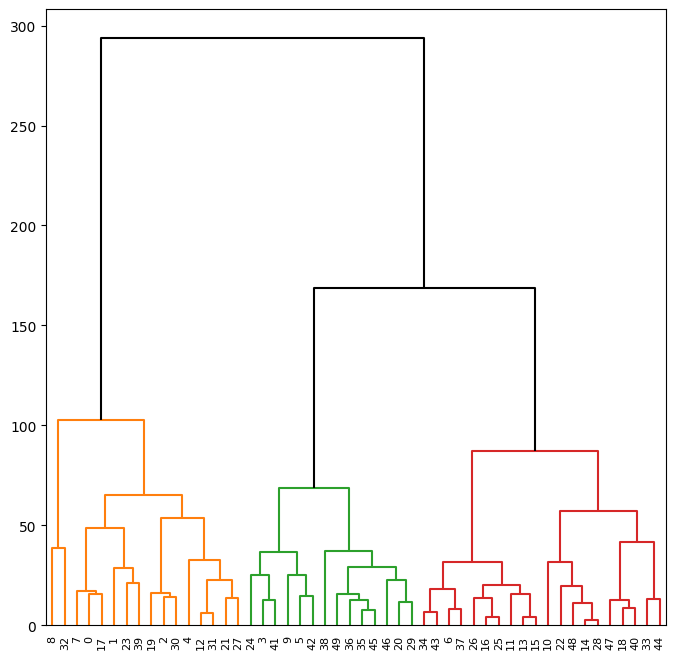

In [17]:
hc_comp.fit(USArrests)
linkage_comp = compute_linkage(hc_comp)

cluster_labels = fcluster(linkage_comp, 3, criterion='maxclust')
thres = np.sort(linkage_comp[:,2])[-(2)]


fig, ax = plt.subplots(figsize= (8,8))

dendrogram(linkage_comp, 
           ax = ax, 
           color_threshold=thres, 
           above_threshold_color='black');

In [23]:
df = pd.DataFrame({'Cluster': np.array(cut_tree(linkage_comp, n_clusters=3).T[0])}, index=US_labels)
df


,Cluster
rownames,
Alabama,0
Alaska,0
Arizona,1
Arkansas,2
California,1
Colorado,1
Connecticut,2
Delaware,2
Florida,1


Post Scaling Results

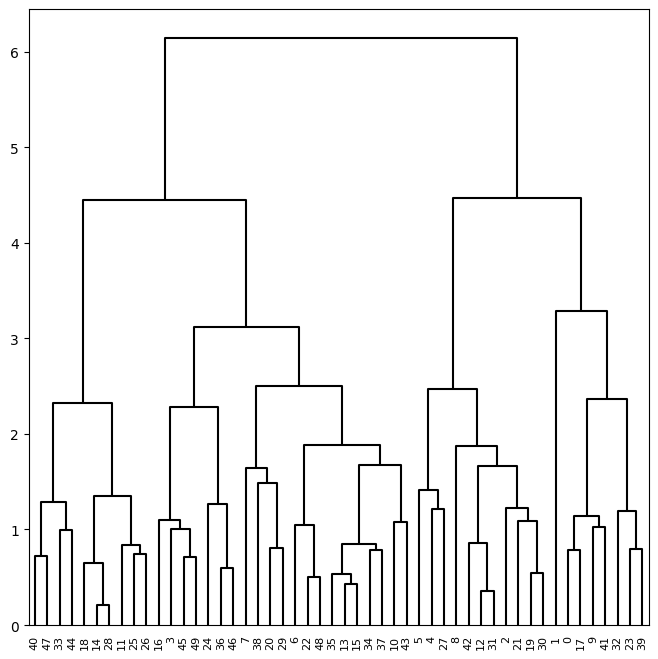

In [18]:
USArrests_scaled = scaler.fit_transform(USArrests)
hc_comp.fit(USArrests_scaled)

linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(figsize= (8,8))

dendrogram(linkage_comp, 
           ax = ax, 
           color_threshold=-np.inf, 
           above_threshold_color='black');

You should scale seeing as the urban populations is on a different scale than the other featrues which is not ideal for unsupervised euclidean distance based methods. 

### Problem 10 

In [52]:
np.random.seed(0)
X = np.random.standard_normal((60,50))
X[:20,0] += 20;
X[:20,30] += 2000;
X[:20,14] -= 100;


X[20:40,1] += 14;
X[20:40,7] -= 1756;
X[20:40,23] += 4;

X[40:,6] -= 2025;
X[40:,23] += 1;
X[40:,40] -= 600;

PCA

Text(0, 0.5, 'PC2')

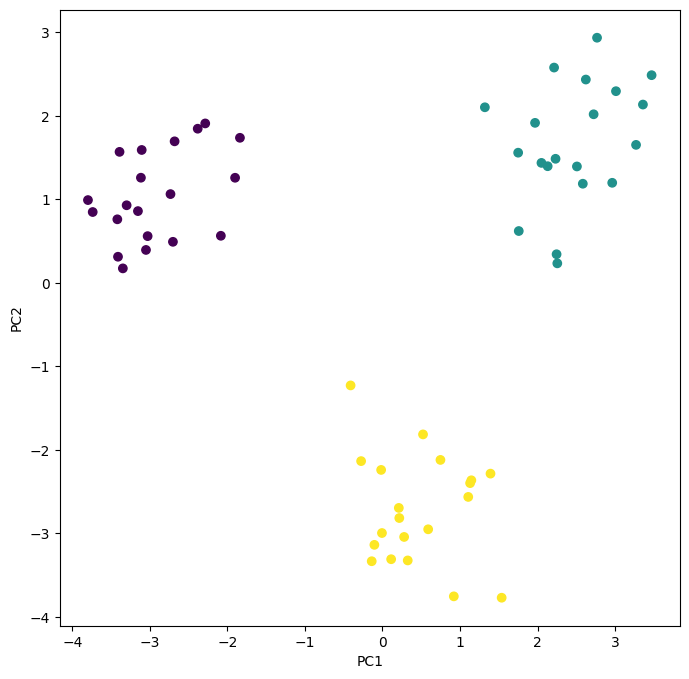

In [53]:
X_scaled = scaler.fit_transform(X)

pcaX = PCA().fit(X_scaled)

scores = pcaX.transform(X_scaled)

true_labels = np.repeat([0, 1, 2], repeats=20)

i, j = 0, 1 # which components

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c= true_labels)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

K Means

In [ ]:
kmeans_3 = KMeans(n_clusters=3,
                random_state=2,
                n_init=20).fit(X)

In [61]:
pd.crosstab(pd.Series(true_labels, name='True Labels'),
            pd.Series(kmeans_3.labels_, name='K-means'))

K-means,0,1,2
True Labels,,,
0,0,0,20
1,20,0,0
2,0,20,0


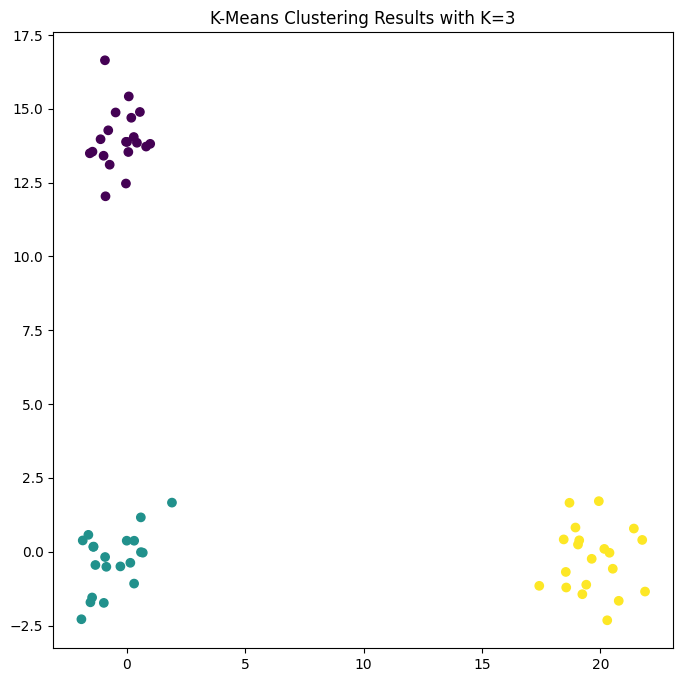

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans_3.labels_)
ax.set_title("K-Means Clustering Results with K=3");

In [62]:
kmeans_2 = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)

pd.crosstab(pd.Series(true_labels, name='True Labels'),
            pd.Series(kmeans_2.labels_, name='K-means'))

K-means,0,1
True Labels,,
0,20,0
1,20,0
2,0,20


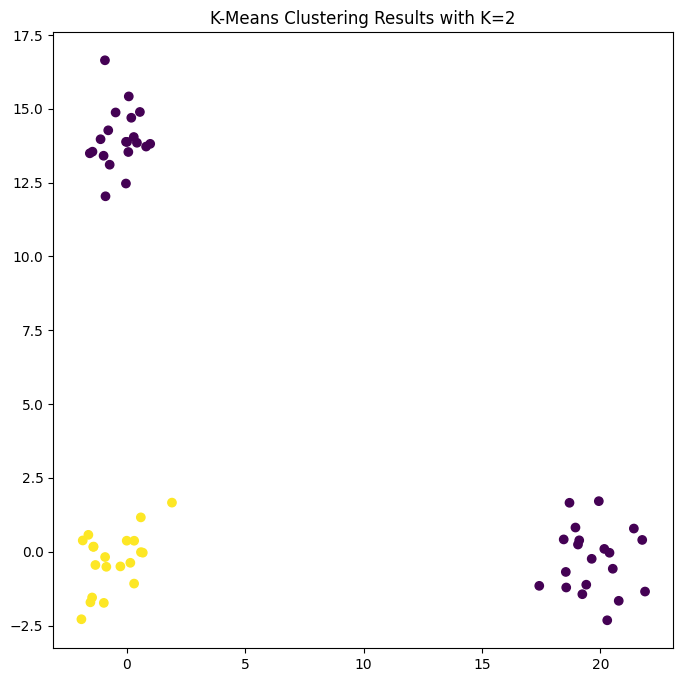

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans_2.labels_)
ax.set_title("K-Means Clustering Results with K=2");

In [63]:
kmeans_4 = KMeans(n_clusters=4,
                random_state=2,
                n_init=20).fit(X)

pd.crosstab(pd.Series(true_labels, name='True Labels'),
            pd.Series(kmeans_4.labels_, name='K-means'))

K-means,0,1,2,3
True Labels,,,,
0,13,0,0,7
1,0,20,0,0
2,0,0,20,0


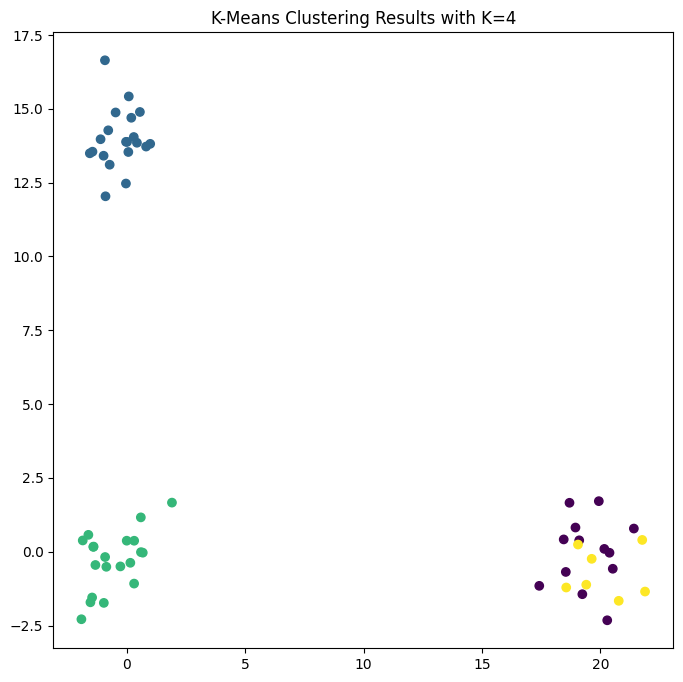

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans_4.labels_)
ax.set_title("K-Means Clustering Results with K=4");

K Means with PC's

In [67]:
kmeans_3_PC = KMeans(n_clusters=3,
                random_state=2,
                n_init=20).fit(scores[:,:1])

pd.crosstab(pd.Series(true_labels, name='True Labels'),
            pd.Series(kmeans_3_PC.labels_, name='K-means'))

K-means,0,1,2
True Labels,,,
0,0,20,0
1,19,0,1
2,1,0,19


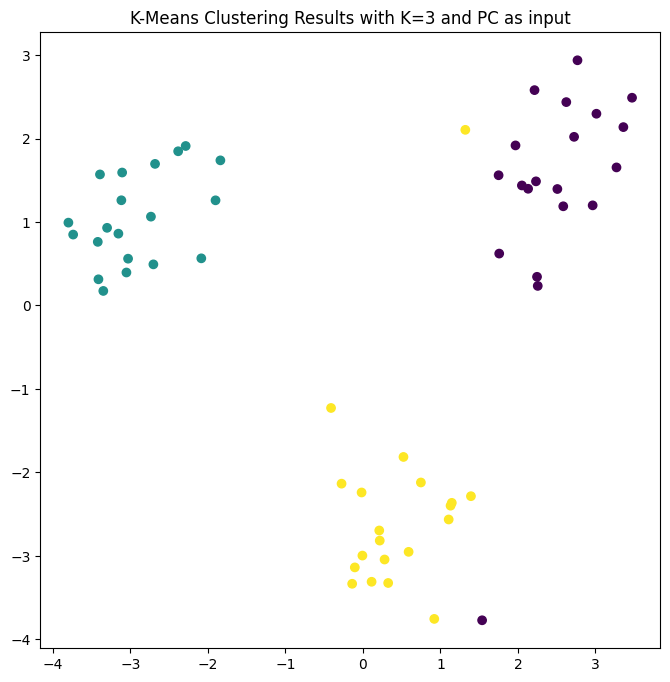

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], c=kmeans_3_PC.labels_)
ax.set_title("K-Means Clustering Results with K=3 and PC as input");

Scaled X measn with K = 3

In [ ]:
kmeans_3_scale = KMeans(n_clusters=3,
                random_state=2,
                n_init=20).fit(X_scaled)

pd.crosstab(pd.Series(true_labels, name='True Labels'),
            pd.Series(kmeans_3_scale.labels_, name='K-means'))



K-means,0,1,2
True Labels,,,
0,20,0,0
1,0,0,20
2,0,20,0


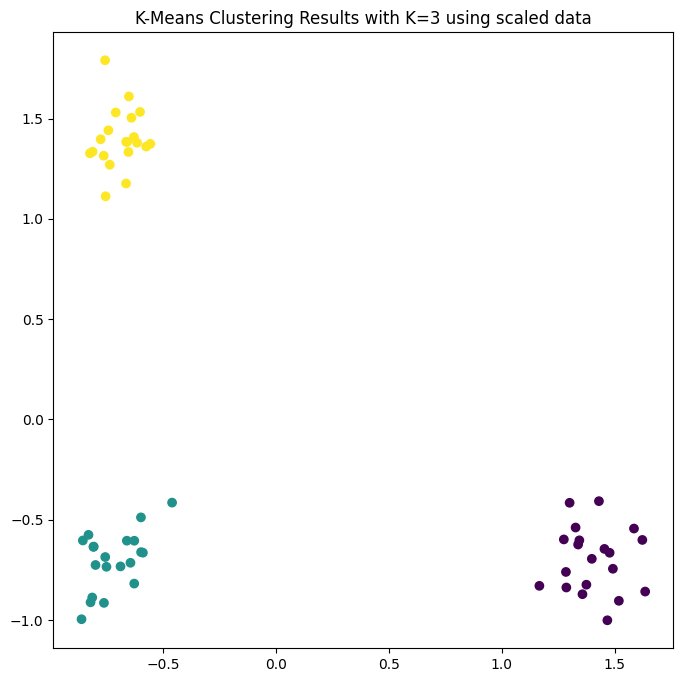

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_3_scale.labels_)
ax.set_title("K-Means Clustering Results with K=3 using scaled data");

### Problem 12

Also using US Arrest data to test this

In [73]:
X = USArrests_scaled

## Omit the 20 entries 

n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]),
                         n_omit,
                         replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),
                         n_omit,
                         replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan


In [ ]:
## Setting up the tilda X 
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]


In [76]:
threshold = 1e-17
rel_err = 1 
count = 0 
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In [81]:
def two_a(Xhat, M=1):
    PC_MA = PCA().fit(Xhat)
    scores = PC_MA.fit_transform(Xhat)
    scores = scores[:, :M]
    return scores.dot(PC_MA.components_[:M])

In [82]:
while rel_err > threshold: 
    count += 1
    Xapp = two_a(Xhat)
    Xhat[ismiss] = Xapp[ismiss]
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))


Iteration: 3, MSS:0.395, Rel.Err 5.99e-01
Iteration: 4, MSS:0.382, Rel.Err 1.27e-02
Iteration: 5, MSS:0.381, Rel.Err 1.18e-03
Iteration: 6, MSS:0.381, Rel.Err 1.34e-04
Iteration: 7, MSS:0.381, Rel.Err 1.82e-05
Iteration: 8, MSS:0.381, Rel.Err 2.84e-06
Iteration: 9, MSS:0.381, Rel.Err 4.94e-07
Iteration: 10, MSS:0.381, Rel.Err 9.18e-08
Iteration: 11, MSS:0.381, Rel.Err 1.77e-08
Iteration: 12, MSS:0.381, Rel.Err 3.49e-09
Iteration: 13, MSS:0.381, Rel.Err 6.98e-10
Iteration: 14, MSS:0.381, Rel.Err 1.41e-10
Iteration: 15, MSS:0.381, Rel.Err 2.85e-11
Iteration: 16, MSS:0.381, Rel.Err 5.80e-12
Iteration: 17, MSS:0.381, Rel.Err 1.19e-12
Iteration: 18, MSS:0.381, Rel.Err 2.43e-13
Iteration: 19, MSS:0.381, Rel.Err 5.00e-14
Iteration: 20, MSS:0.381, Rel.Err 1.03e-14
Iteration: 21, MSS:0.381, Rel.Err 2.14e-15
Iteration: 22, MSS:0.381, Rel.Err 5.07e-16
Iteration: 23, MSS:0.381, Rel.Err 0.00e+00


In [83]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.7111763136377895